In [2]:
import datetime as dt
import numpy as np
import pickle
import gdal

import datetime as dt

from plot_kafka_retrieval_utils import extract_pixel, plot_pixel_tseries

import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def get_pixel(filepath, year, x, y):
    """
    Get retrieved parameters and uncertainties for a single pixel
    This will open the data from a pickle file if it exists, otherwise
    it calls extract_pixel, which will get the data and also store a pickle file
    for next time.
    """
    file = filepath+"/pixel_{}_{}.pkl".format(x,y)
    try:
        data, uncs, dates = pickle.load(open(file, 'rb'))
    except FileNotFoundError:
        data, uncs, dates = extract_pixel(filepath, year, x,y, params=None, outfile=file)
    return data, uncs, dates

In [4]:
def plot_all_params(axs, params, filepaths, year, x, y, legend = None):
    """loop through different retrieval direcories and plot all parameters"""
    for ax, param in zip(axs, params):
        title = "{}".format(param)
        if param == "LAI":
            param = "TeLAI"
            convertLAI = True
        else:
            convertLAI = False
        for f in filepaths:
            data, uncs, dates = get_pixel(f, year, x,y)
            plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                               marker='-', convertLAI=convertLAI)
        #ax.set_title(title)
        if legend !=None:
            ax.legend(legend)
    return axs

In [70]:

import pandas as pd
# These files were downloaded from here: https://modis.ornl.gov/sites/
# or
# https://modis.ornl.gov/cgi-bin/MODIS/global/subset.pl
Nebraska_MOD_prod_file = "/media/DataShare/Nicola/MODIS_LAI_Nebraska/statistics_Lai_500m.csv"
Nebraska2_MOD_prod_file = "/media/DataShare/Nicola/MODIS_LAI_Nebraska/statistics_Lai_500m_Ne2.csv"
Nebraska3_MOD_prod_file = "/media/DataShare/Nicola/MODIS_LAI_Nebraska/statistics_Lai_500m_Ne3.csv"
Harvard_MOD_prod_file = "/media/DataShare/Nicola/MODIS_LAI_Harvard/statistics_Lai_500m_Ha_lph.csv"
def plot_MODIS_LAIprod(file, year, ax):
    df = pd.read_csv(file)
    try:
        dates = df[' modis_date']
        LAI = df[' value_center']
    except KeyError:
        dates = df['date[YYYYDDD]']
        LAI = df['mean']
    years = np.array([int(d[1:5]) for d in dates])
    doys = np.array([int(d[-3:]) for d in dates])
    year_location = np.where(years==year)
    mask = (LAI.values!='F') & (years==year)
    lai = np.array(pd.to_numeric(LAI, errors='coerce'))
    im = ax.plot(doys[year_location], lai[year_location], 'x')
    return im, ax


In [59]:
# These [parameters may be used for any broadband SAIL retrieval]
params=["LAI","TeLAI", "w_nir", "x_nir", "a_nir",
        "w_vis", "x_vis", "a_vis"]

# Harvard Forest

## Harvard, Little Prospect Hill

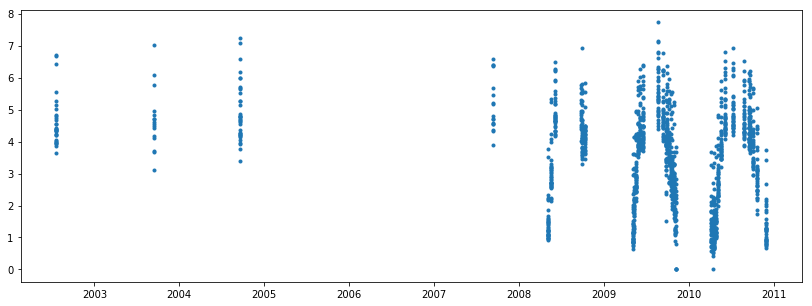

In [60]:
# Availability of Field data
fig, axs = plt.subplots(1,1, figsize=(14,5))
df = pd.read_csv("/data/Harvard_validation_LAI/hf150-02-lph-lai.csv")
doys = np.array(df['doy'], dtype=int)
lai = np.array(df['lai.masked'])
dates = df['date']
years = np.array([int(d[0:4]) for d in dates])
dates = [dt.date(y,1,1)+dt.timedelta(days=int(doy)) for y, doy in zip(years, doys)]
plt.plot_date(dates, lai, '.')

<class 'numpy.ndarray'> [3.96 3.87 3.99 ... 0.75 0.67 0.72]
[2002 2002 2002 ... 2010 2010 2010]
[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353]


/home/npounder/anaconda2/envs/py36_gp_emulator/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


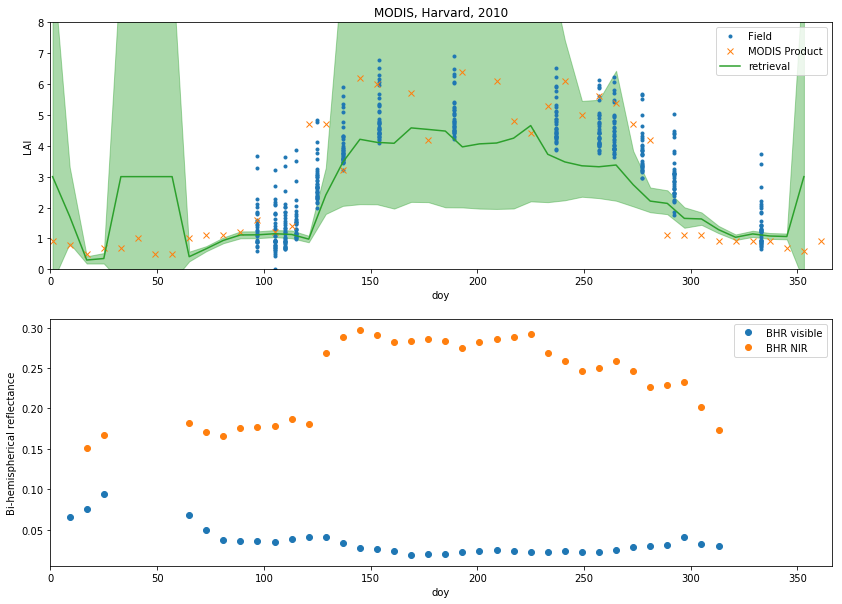

In [62]:
fig, axs = plt.subplots(2,1, figsize=(14,10))
axs = axs.flatten()
ax = axs[0]

# Field site data for 2010
df = pd.read_csv("/data/Harvard_validation_LAI/hf150-02-lph-lai.csv")
doys = np.array(df['doy'])
lai = np.array(df['lai.masked'])
print(type(lai), lai)
dates = df['date']
years = np.array([int(d[0:4]) for d in dates])
print(years)
year_location = np.where(years==2010)
ax.plot(doys[year_location], lai[year_location], '.')


plot_MODIS_LAIprod(Harvard_MOD_prod_file, 2010, ax)


files = [#"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_p1-5_e1",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_prior3_err3",
         "/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_p3_e1",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_prior1-5_err3",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_p1-5_e1_green/",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_noprop_p3_e1_green/"
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q0-01",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q0-1",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q0-25",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q0-5",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q0-75",
         #"/home/npounder/output/kafka/validation/kafkaout_harvard_2010_Q1"
        ]
legend = ["Field", "MODIS Product", "retrieval"]
          #"p1.5, e1", "p3, e3", "p3, e1", "p1.5, e3", "p1.5, e1, green leaves", "p3, e1, green leaves"]
param = "TeLAI"
#y = 1790; x= 1636
y = 1789; x= 1636
for f in files:
    data, uncs, dates = get_pixel(f, 2010, x,y)
    dates = [d-8 for d in dates]
    print(dates)
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
ax.legend(legend)
ax.set_title("MODIS, Harvard, 2010")

axs[0].set_xlim((0, 366))
axs[0].set_ylim((0,8))

vis, nir, ndvi, doys = pickle.load(
    open("/home/npounder/repositories/python3/KaFKA-InferenceEngine/ndvi_harvard_y1789_x1636",
         'rb'))
#ndvi2, doys = pickle.load(open("/home/npounder/repositories/python3/KaFKA-InferenceEngine/ndvi_harvard_2009_y1636_x1790", 'rb'))
#axs[1].plot(doys, ndvi)
axs[1].plot(doys, vis, 'o')
axs[1].plot(doys, nir, 'o')
#axs[1].plot(doys, ndvi2)
axs[1].set_xlim((0, 366))
axs[1].set_xlabel('doy')
axs[1].set_ylabel('Bi-hemispherical reflectance')
axs[1].legend(["BHR visible", "BHR NIR"])

<class 'numpy.ndarray'> [3.96 3.87 3.99 ... 0.75 0.67 0.72]
[2002 2002 2002 ... 2010 2010 2010]
[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353]


/home/npounder/anaconda2/envs/py36_gp_emulator/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


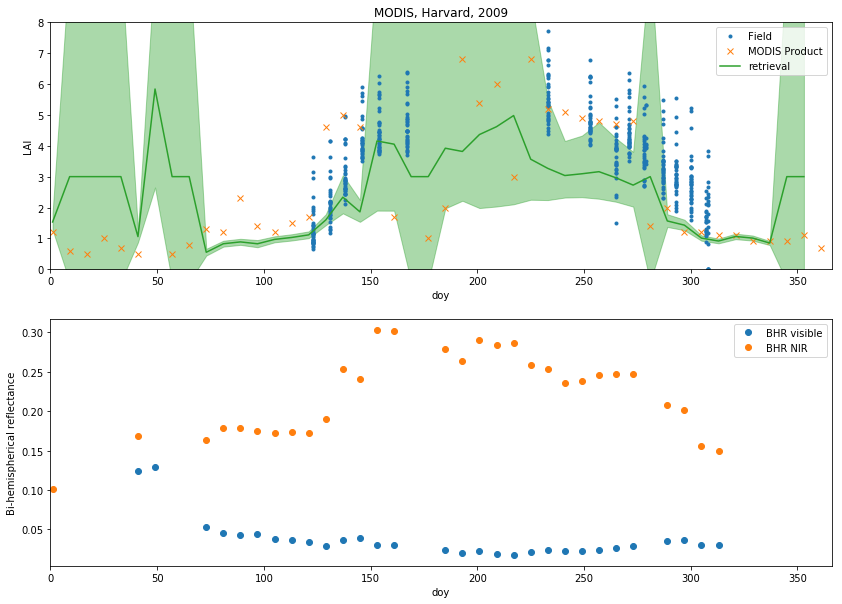

In [73]:
fig, axs = plt.subplots(2,1, figsize=(14,10))
axs = axs.flatten()
ax = axs[0]

# Field site data for 2010
df = pd.read_csv("/data/Harvard_validation_LAI/hf150-02-lph-lai.csv")
doys = np.array(df['doy'])
lai = np.array(df['lai.masked'])
print(type(lai), lai)
dates = df['date']
years = np.array([int(d[0:4]) for d in dates])
print(years)
year_location = np.where(years==2009)
ax.plot(doys[year_location], lai[year_location], '.')


plot_MODIS_LAIprod(Harvard_MOD_prod_file, 2009, ax)


files = ["/home/npounder/output/kafka/validation/kafkaout_harvard_2009_noprop_p3_e1"
        ]
legend = ["Field", "MODIS Product", "retrieval"]
param = "TeLAI"
#y = 1790; x= 1636
y = 1789; x= 1636
for f in files:
    data, uncs, dates = get_pixel(f, 2009, x,y)
    dates = [d-8 for d in dates]
    print(dates)
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
ax.legend(legend)
ax.set_title("MODIS, Harvard, 2009")

axs[0].set_xlim((0, 366))
axs[0].set_ylim((0,8))

vis, nir, ndvi, doys = pickle.load(
    open("/home/npounder/repositories/python3/KaFKA-InferenceEngine/ndvi_harvard_2009_y1789_x1636",
         'rb'))
#ndvi2, doys = pickle.load(open("/home/npounder/repositories/python3/KaFKA-InferenceEngine/ndvi_harvard_y1636_x1790", 'rb'))

#axs[1].plot(doys, ndvi)
axs[1].plot(doys, vis, 'o')
axs[1].plot(doys, nir, 'o')
#axs[1].plot(doys, ndvi2)
axs[1].set_xlim((0, 366))
axs[1].set_xlabel('doy')
axs[1].set_ylabel('Bi-hemispherical reflectance')
axs[1].legend(["BHR visible", "BHR NIR"])

## Harvard, Hemlock
Field data availability: We have only one or two observations per year and and no data in 2010.

Equivilent MODIS pixel is line = 1790; sample = 1635 (lat 42.539, lon, -72.180)

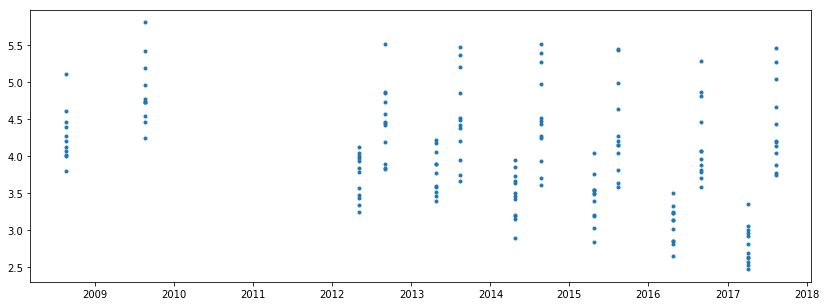

In [43]:
fig, axs = plt.subplots(1,1, figsize=(14,5))
df = pd.read_csv("/data/Harvard_validation_LAI/hf150-01-hem-lai.csv")
doys = np.array(df['doy'], dtype=int)
lai = np.array(df['lai.masked'])
dates = df['date']
years = np.array([int(d[0:4]) for d in dates])
dates = [dt.date(y,1,1)+dt.timedelta(days=int(doy)) for y, doy in zip(years, doys)]
plt.plot_date(date, lai, '.')

## Nebraska 2017

saving output to /home/npounder/output/kafka/validation/kafkaout_nebraska_2017_noprop_p1-5_e1/pixel_1769_2108.pkl
[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353]
saving output to /home/npounder/output/OLCI/mul_test5_1_sigma_noprop/pixel_569_908.pkl


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353]
saving output to /home/npounder/output/OLCI/mul_test4_7daysmask/pixel_569_908.pkl
[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353]


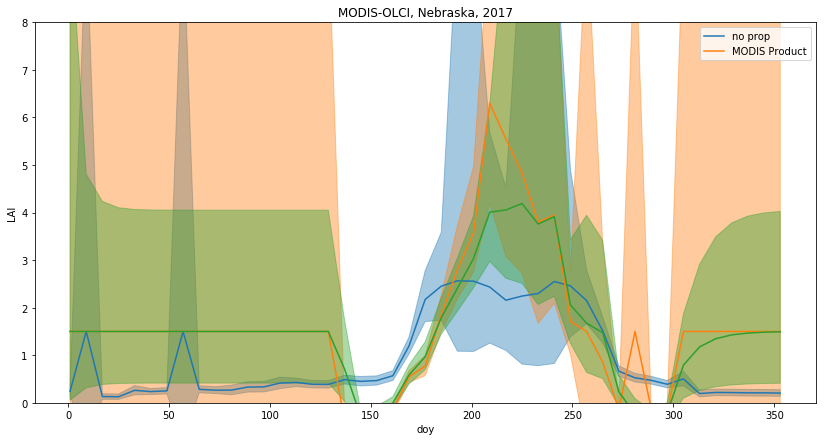

In [84]:

basey=  920; basex= 568
basey=  910; basex= 568
basey=  908; basex= 569

fig, ax = plt.subplots(1,1, figsize=(14,7))
param = "TeLAI"

y=basey+1200; x=basex+1200
file = "/home/npounder/output/kafka/validation/kafkaout_nebraska_2017_noprop_p1-5_e1"
data, uncs, dates = get_pixel(file, 2017, x,y)
dates = [d-8 for d in dates]
print(dates)
plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)

y =basey; x=basex
files = ["/home/npounder/output/OLCI/mul_test5_1_sigma_noprop" ,
         "/home/npounder/output/OLCI/mul_test4_7daysmask"]
     
legend = ["no prop", "MODIS Product"]

#plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2008, ax)

for f in files:
    data, uncs, dates = get_pixel(f, 2017, x,y)
    dates = [d-8 for d in dates]
    print(dates)

    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
ax.set_ylim((0,8))
ax.set_title("MODIS-OLCI, Nebraska, 2017")
ax.legend(legend)

## Nebraska 2007

[0.47236654 0.9257653  0.47236654 0.47236654 0.47236654 0.47236654
 0.47236654 0.47236654 0.47236654 0.897773   0.8581721  0.80138177
 0.72853684 0.7443849  0.72075844 0.6900076  0.7699991  0.7330117
 0.62573254 0.6778861  0.5156304  0.3465976  0.34575927 0.3408575
 0.30720145 0.2528663  0.23879492 0.30014542 0.26868033 0.26230115
 0.29326656 0.38217506 0.5076515  0.68429667 0.7326005  0.7370005
 0.7689223  0.7616085  0.74549586 0.8309227  0.8189532  0.82929194
 0.47236654]


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


Text(0.5,1,'MODIS, Nebraska, 2007')

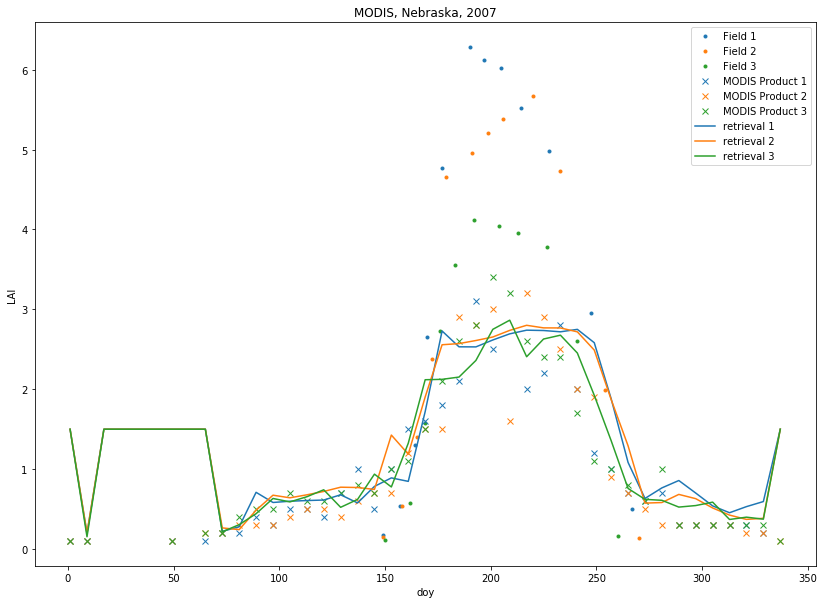

In [7]:
# Field site data for 2007
#FieldLAI = [0.03,0.19,0.86,2.85,5.12,5.33,5.75,5.49,5.26,4.63,2.40,0.48]
#FieldLAIDOY = [154,165,175,186,195,206,214,223,235,251,270,284]
FieldLAI_1=[0.179,0.534,1.306,2.656,4.769,6.284,6.116,6.024,5.514,4.986,2.960,0.506]
FieldLAIDOY_1 = [149,157,164,170,177,190,197,205,214.5,227.5,247.5,267]
FieldLAI_2=[0.157,0.543,1.397,2.378,4.652,4.962,5.202,5.383,5.669,4.725,1.996,0.135]
FieldLAIDOY_2 = [149,158,165,172,179,191,198.5,206,220,233,254,270]

FieldLAI_3=[0.116,0.579,1.583,2.732,3.554,4.122,4.045,3.951,3.786,2.601,0.169]
FieldLAIDOY_3 = [150,162,169,176,183,192,204,213,226.5,240.7,260]
fig, ax = plt.subplots(1,1, figsize=(14,10  ))
#ax = ax.flatten()
im_field1 = ax.plot(FieldLAIDOY_1, FieldLAI_1, '.')
im_field2 = ax.plot(FieldLAIDOY_2, FieldLAI_2, '.')
im_field2 = ax.plot(FieldLAIDOY_3, FieldLAI_3, '.')
ax.set_prop_cycle(None)
plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2007, ax)
plot_MODIS_LAIprod(Nebraska2_MOD_prod_file, 2007, ax)
plot_MODIS_LAIprod(Nebraska3_MOD_prod_file, 2007, ax)
ax.set_prop_cycle(None)


files = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2007_noprop_p1-5_e1/"]
legend = ["Field 1","Field 2","Field 3", 
          "MODIS Product 1", "MODIS Product 2", "MODIS Product 3",
          "retrieval 1", "retrieval 2","retrieval 3"]

param = "TeLAI"
y = 2119; x= 1768
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)  
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=False)
y = 2119; x= 1769
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=False)
y = 2116; x= 1779
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)
    dates = [d-8 for d in dates]
    print(data[param])
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=False)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
plt.legend(legend)

ax.set_title("MODIS, Nebraska, 2007")

[0.47236654 0.9257653  0.47236654 0.47236654 0.47236654 0.47236654
 0.47236654 0.47236654 0.47236654 0.897773   0.8581721  0.80138177
 0.72853684 0.7443849  0.72075844 0.6900076  0.7699991  0.7330117
 0.62573254 0.6778861  0.5156304  0.3465976  0.34575927 0.3408575
 0.30720145 0.2528663  0.23879492 0.30014542 0.26868033 0.26230115
 0.29326656 0.38217506 0.5076515  0.68429667 0.7326005  0.7370005
 0.7689223  0.7616085  0.74549586 0.8309227  0.8189532  0.82929194
 0.47236654]


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


Text(0.5,1,'MODIS, Nebraska, NE3, 2007')

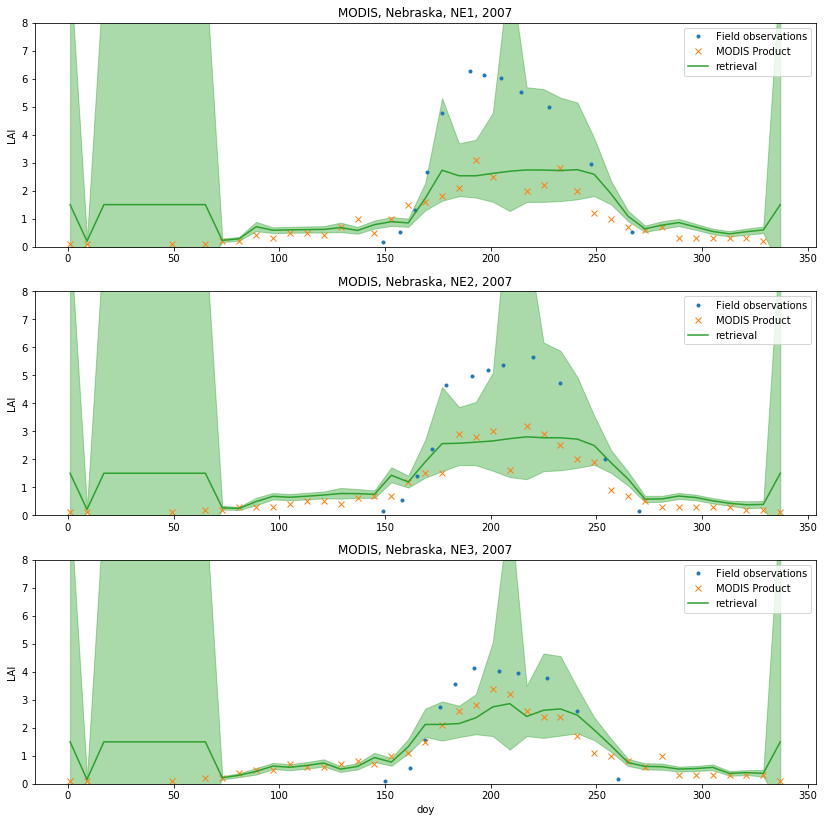

In [25]:
# Field site data for 2007
#FieldLAI = [0.03,0.19,0.86,2.85,5.12,5.33,5.75,5.49,5.26,4.63,2.40,0.48]
#FieldLAIDOY = [154,165,175,186,195,206,214,223,235,251,270,284]
FieldLAI_1=[0.179,0.534,1.306,2.656,4.769,6.284,6.116,6.024,5.514,4.986,2.960,0.506]
FieldLAIDOY_1 = [149,157,164,170,177,190,197,205,214.5,227.5,247.5,267]
FieldLAI_2=[0.157,0.543,1.397,2.378,4.652,4.962,5.202,5.383,5.669,4.725,1.996,0.135]
FieldLAIDOY_2 = [149,158,165,172,179,191,198.5,206,220,233,254,270]

FieldLAI_3=[0.116,0.579,1.583,2.732,3.554,4.122,4.045,3.951,3.786,2.601,0.169]
FieldLAIDOY_3 = [150,162,169,176,183,192,204,213,226.5,240.7,260]


fig, ax = plt.subplots(3,1, figsize=(14,14  ))
ax = ax.flatten()
im_field1 = ax[0].plot(FieldLAIDOY_1, FieldLAI_1, '.')
im_field2 = ax[1].plot(FieldLAIDOY_2, FieldLAI_2, '.')
im_field2 = ax[2].plot(FieldLAIDOY_3, FieldLAI_3, '.')

plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2007, ax[0])
plot_MODIS_LAIprod(Nebraska2_MOD_prod_file, 2007, ax[1])
plot_MODIS_LAIprod(Nebraska3_MOD_prod_file, 2007, ax[2])

files = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2007_noprop_p1-5_e1/"]
legend = ["Field 1","Field 2","Field 3", 
          "MODIS Product 1", "MODIS Product 2", "MODIS Product 3",
          "retrieval 1", "retrieval 2","retrieval 3"]

legend = ["Field observations", "MODIS Product","retrieval"]

param = "TeLAI"
y = 2119; x= 1768
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)  
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax[0], data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=True)
y = 2119; x= 1769
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax[1], data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=True)
y = 2116; x= 1779
for f in files:
    data, uncs, dates = get_pixel(f, 2007, x,y)
    dates = [d-8 for d in dates]
    print(data[param])
    plot_pixel_tseries(ax[2], data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True, plot_unc=True)
ax[2].set_xlabel("doy")
for a in ax:
    a.set_ylabel("LAI")
    a.legend(legend)
    a.set_ylim((0,8))

ax[0].set_title("MODIS, Nebraska, NE1, 2007")
ax[1].set_title("MODIS, Nebraska, NE2, 2007")
ax[2].set_title("MODIS, Nebraska, NE3, 2007")

## Nebraska 2008

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:174: RuntimeWarning: invalid value encountered in log
  data = -2*np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:176: RuntimeWarning: invalid value encountered in log
  u_unc = -2.*np.log(u_unc)


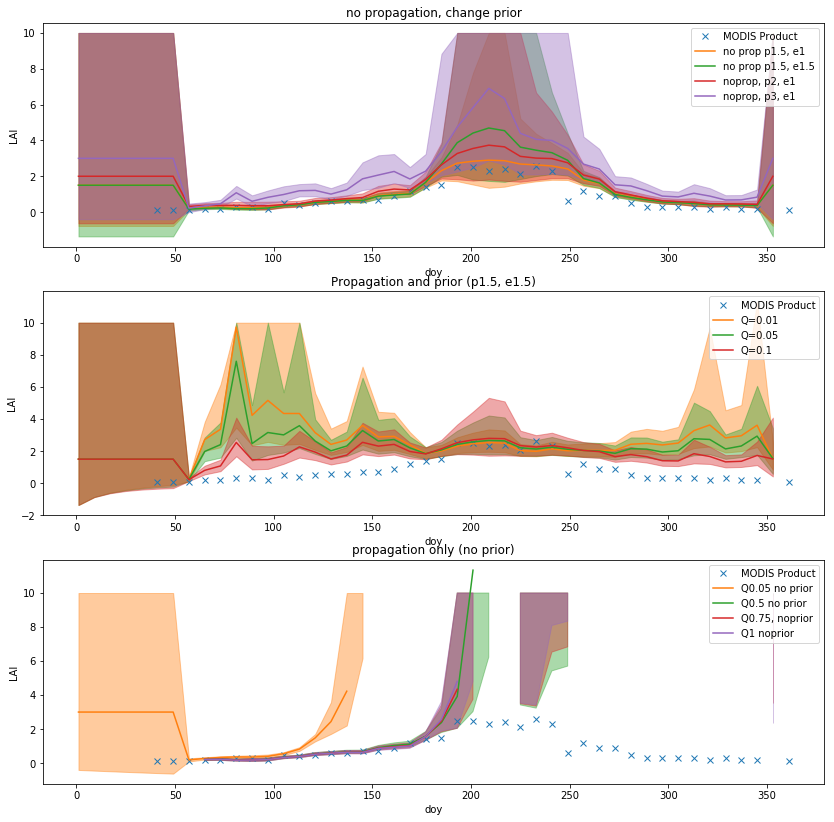

In [9]:
# Field site data for 2011
#FieldLAI = [0.03,0.19,0.86,2.85,5.12,5.33,5.75,5.49,5.26,4.63,2.40,0.48]
#FieldLAIDOY = [154,165,175,186,195,206,214,223,235,251,270,284]



fig, axs = plt.subplots(3,1, figsize=(14,14))
axs = axs.flatten()
#im_field = ax.plot(FieldLAIDOY, FieldLAI)


param = "TeLAI"
y = 2119; x= 1768
files = {}

files_noprop = [#"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior1/",
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_p1-5_e1/",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_prior1-5_err1-5/",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_prior2_err1", 
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_prior3_err1"]
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior2_err2/"]
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior3/",
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior4/",
        # "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior4_err3"]
legend1 = [#"Field1","Field2","Field3",
        "MODIS Product","no prop p1.5, e1" ,"no prop p1.5, e1.5", "noprop, p2, e1", "noprop, p3, e1"]
title1 = "no propagation, change prior"

    
files_propAndPrior = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-01_prior1-5_err1-5/",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-05_prior1-5_err1-5/",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-1_prior1-5_err1-5/"]
legend2 = [#"Field", 
          "MODIS Product","Q=0.01","Q=0.05","Q=0.1"]
title2 = "Propagation and prior (p1.5, e1.5)"

files_propNoPrior =["/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-05_noprior",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-5_noprior", 
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q0-75_noprior", 
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_Q1_noprior"]
legend3 = [#"Field", 
          "MODIS Product", "Q0.05 no prior", "Q0.5 no prior","Q0.75, noprior", "Q1 noprior"]
title3 = "propagation only (no prior)"

all_files = [files_noprop,files_propAndPrior,files_propNoPrior]
all_legends = [legend1, legend2, legend3]
all_titles = [title1, title2, title3]


for files, legend, title, ax in zip(all_files, all_legends, all_titles, axs):

    plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2008, ax)
    for f in files:
        data, uncs, dates = get_pixel(f, 2008, x,y)
        dates = [d-8 for d in dates]

        plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                       marker = '-', convertLAI = True)
    ax.set_xlabel("doy")
    ax.set_ylabel("LAI")
    ax.set_title(title)
    ax.legend(legend)
    

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


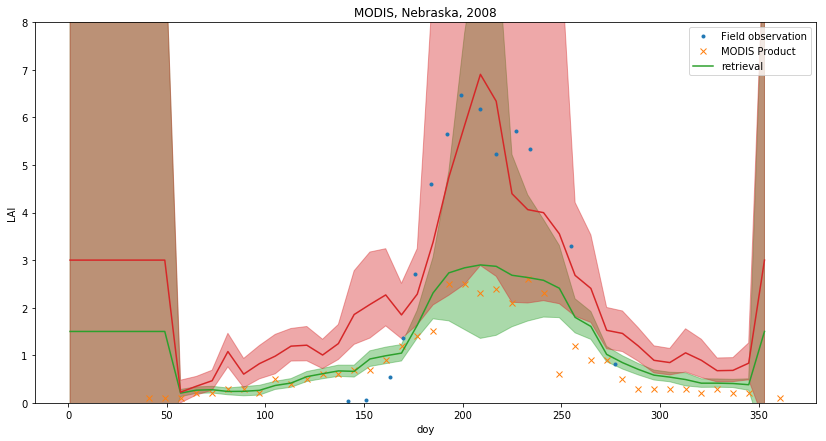

In [46]:
# Field site data for 2008
FieldLAI = [0.03,0.06,0.54,1.37,2.70,4.60,5.65,6.48,6.18,5.24,5.71,5.33,3.30,0.81]
FieldLAIDOY = [142,151,163,170,176,184,192,199,209,217,227,234,255,277]



fig, ax = plt.subplots(1,1, figsize=(14,7))
#axs = axs.flatten()
im_field = ax.plot(FieldLAIDOY, FieldLAI,'.')


param = "TeLAI"
y = 2119; x= 1768
files = {}

files = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_p1-5_e1/" ,
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2008_noprop_prior3_err1"]
     
legend = ["Field observation", "MODIS Product","retrieval"]

plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2008, ax)

for f in files:
    data, uncs, dates = get_pixel(f, 2008, x,y)
    dates = [d-8 for d in dates]

    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
ax.set_ylim((0,8))
ax.set_title("MODIS, Nebraska, 2008")
ax.legend(legend)
    

## Nebraska 2011

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


(0, 8)

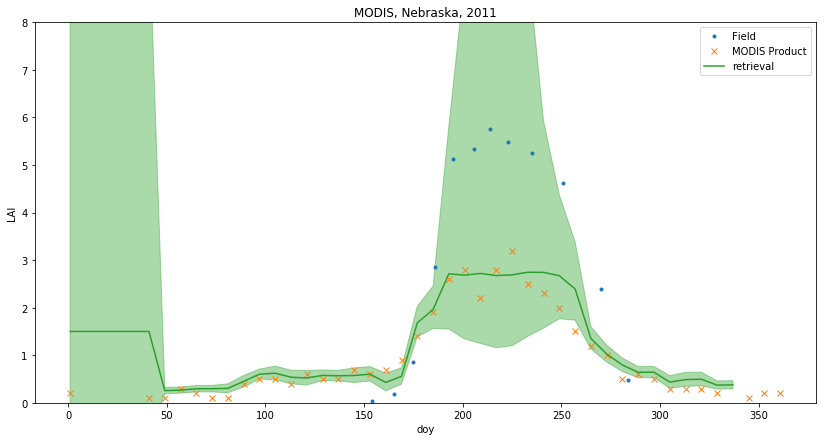

In [19]:
# Field site data for 2011
FieldLAI = [0.03,0.19,0.86,2.85,5.12,5.33,5.75,5.49,5.26,4.63,2.40,0.48]
FieldLAIDOY = [154,165,175,186,195,206,214,223,235,251,270,284]

fig, ax = plt.subplots(1,1, figsize=(14,7
                                    ))
#ax = ax.flatten()
im_field = ax.plot(FieldLAIDOY, FieldLAI, '.')

plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2011, ax)


files = [##"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior1/",
        ##"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop",
        "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior1-5_err1/"]
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior1-5_err1-5/"]#,
        #"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior2/"]
        ##"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior2_err2/"]
        ##"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior3/",
        ##"/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior4/",
        ## "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop_prior4_err3"]
legend = ["Field", "MODIS Product", "retrieval"]#,"prior=1.5, err=1.0", "prior=1.5, err=1.5", "Prior=2.0, err=0.5"]
#          "prior=4.0", "Prior=4.0,Err=3.0"]
param = "TeLAI"
y = 2119; x= 1768
for f in files:
    data, uncs, dates = get_pixel(f, 2011, x,y)
    
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
plt.legend(legend)
ax.set_title("MODIS, Nebraska, 2011")
ax.set_ylim((0,8))

saving output to /home/npounder/output/kafka/validation/kafkaout_nebraska_2017_noprop_p1-5_e1/pixel_1768_2119.pkl


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:175: RuntimeWarning: invalid value encountered in log
  l_unc = -2.*np.log(l_unc)


(0, 8)

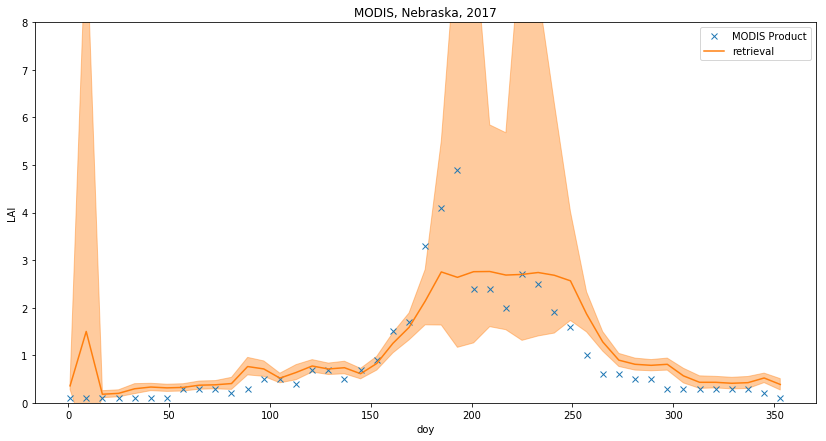

In [67]:
# Field site data for 2011
#FieldLAI = [0.03,0.19,0.86,2.85,5.12,5.33,5.75,5.49,5.26,4.63,2.40,0.48]
#FieldLAIDOY = [154,165,175,186,195,206,214,223,235,251,270,284]

fig, ax = plt.subplots(1,1, figsize=(14,7
                                    ))
#ax = ax.flatten()
#im_field = ax.plot(FieldLAIDOY, FieldLAI, '.')

plot_MODIS_LAIprod(Nebraska_MOD_prod_file, 2017, ax)


files = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2017_noprop_p1-5_e1"]
legend = ["MODIS Product", "retrieval"]#,"prior=1.5, err=1.0", "prior=1.5, err=1.5", "Prior=2.0, err=0.5"]
#          "prior=4.0", "Prior=4.0,Err=3.0"]
param = "TeLAI"
y = 2119; x= 1768
for f in files:
    data, uncs, dates = get_pixel(f, 2017, x,y)
    
    dates = [d-8 for d in dates]
    plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)
ax.set_xlabel("doy")
ax.set_ylabel("LAI")
plt.legend(legend)
ax.set_title("MODIS, Nebraska, 2017")
ax.set_ylim((0,8))

In [ ]:
filepaths = ["/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_noprop",
             "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_0-05",
             "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_0-075",
             "/home/npounder/output/kafka/validation/kafkaout_nebraska_2011_0-1"]
legend = ("none","0.05", "0.075", "0.1")
x = 884; y= 1059

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2011, x, y, legend = legend)